<a href="https://colab.research.google.com/github/Neilus03/Basic-Text-Processing-Exercises/blob/main/NLP_Probelms2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The following pages contain the solution for **Exercises-Lesson 2: Basic Text Processing**

#####By: **Neil de la Fuente**. 
Reach me: [Linkedin](https://www.linkedin.com/in/neil-de-la-fuente)


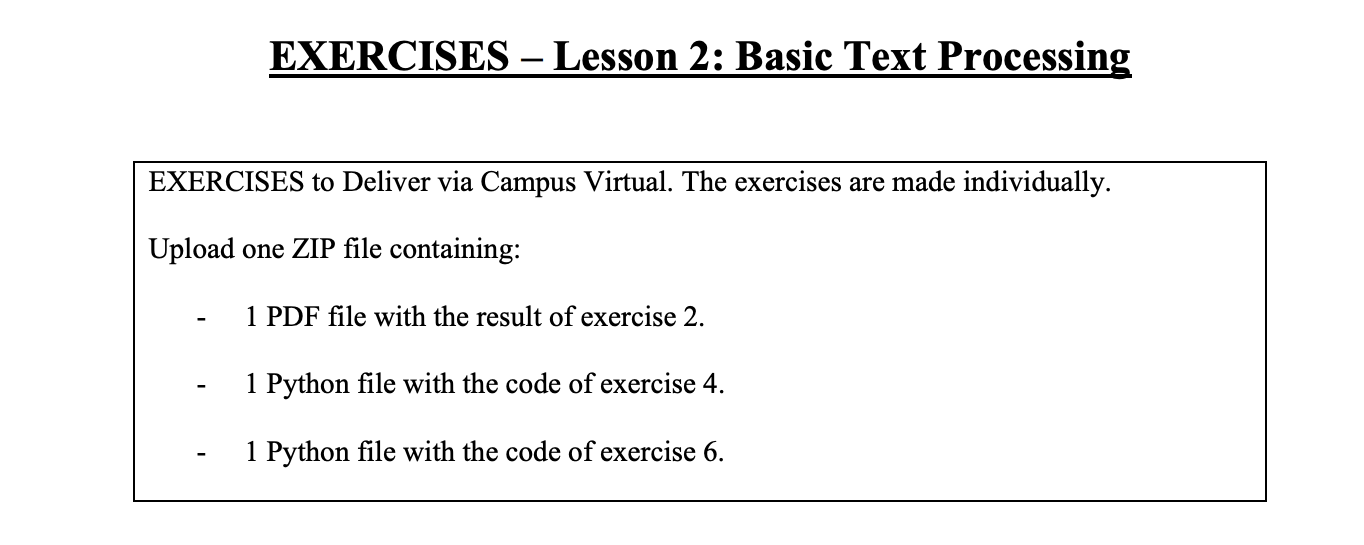

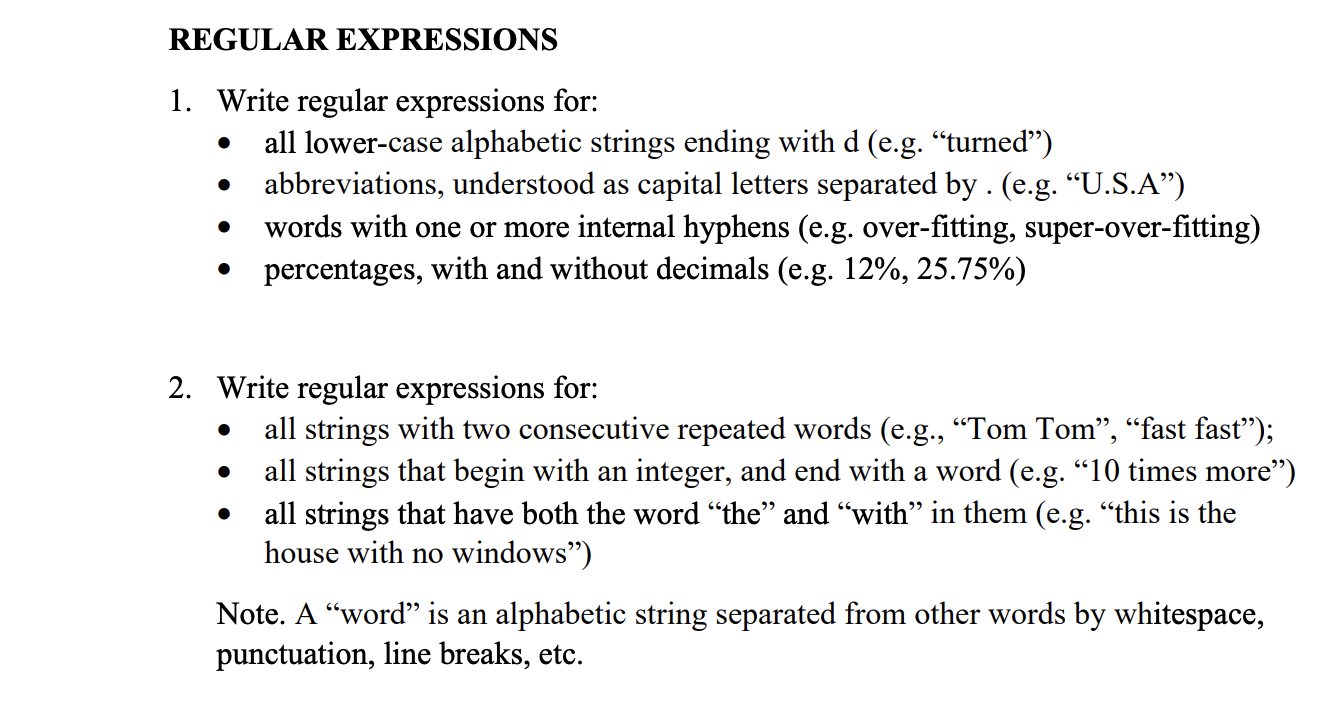



### 1.   Write regular expressions for:

*   all lower-case alphabetic strings ending with d (e.g. “turned”) :     `[a-z]*d\b`
*   abbreviations, understood as capital letters separated by . (e.g. “U.S.A”) :    `[A-Z]((\ .[A-Z])+)*`

*   words with one or more internal hyphens (e.g. over-fitting, super-over-fitting) : `[a-zA-Z]+(-[a-zA-Z]+)+`
*   percentages, with and without decimals (e.g. 12%, 25.75%) : `\d+(\.\d+)?%`






 









### 2.   Write regular expressions for:

*   all strings with two consecutive repeated words (e.g., “Tom Tom”, “fast fast”) : `\b([a-zA-Z]+)\s+\1\b`
*   all strings that begin with an integer, and end with a word (e.g. “10 times more”) : `^\d+\s.*\w$`
*   all strings that have both the word “the” and “with” in them (e.g. “this is the house with no windows”) : `.*\bthe\b.*\bwith\b.*|.*\bwith\b.*\bthe\b.*`


Note. A “word” is an alphabetic string separated from other words by whitespace,
punctuation, line breaks, etc

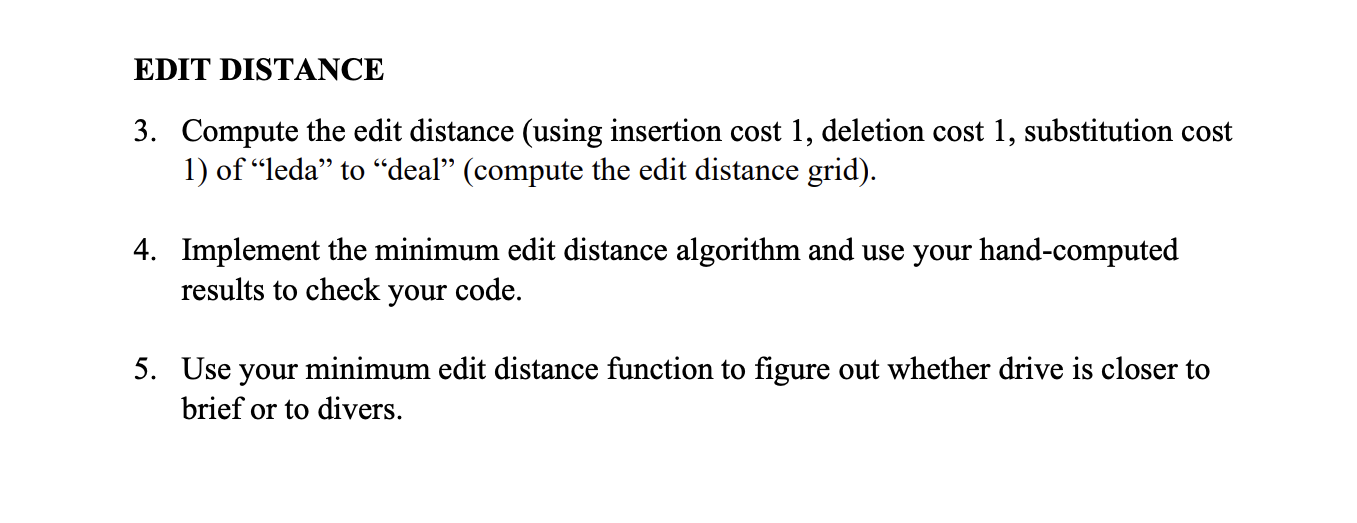

### 3.Compute the edit distance (using insertion cost 1, deletion cost 1, substitution cost **1**) of “leda” to “deal” (compute the edit distance grid).

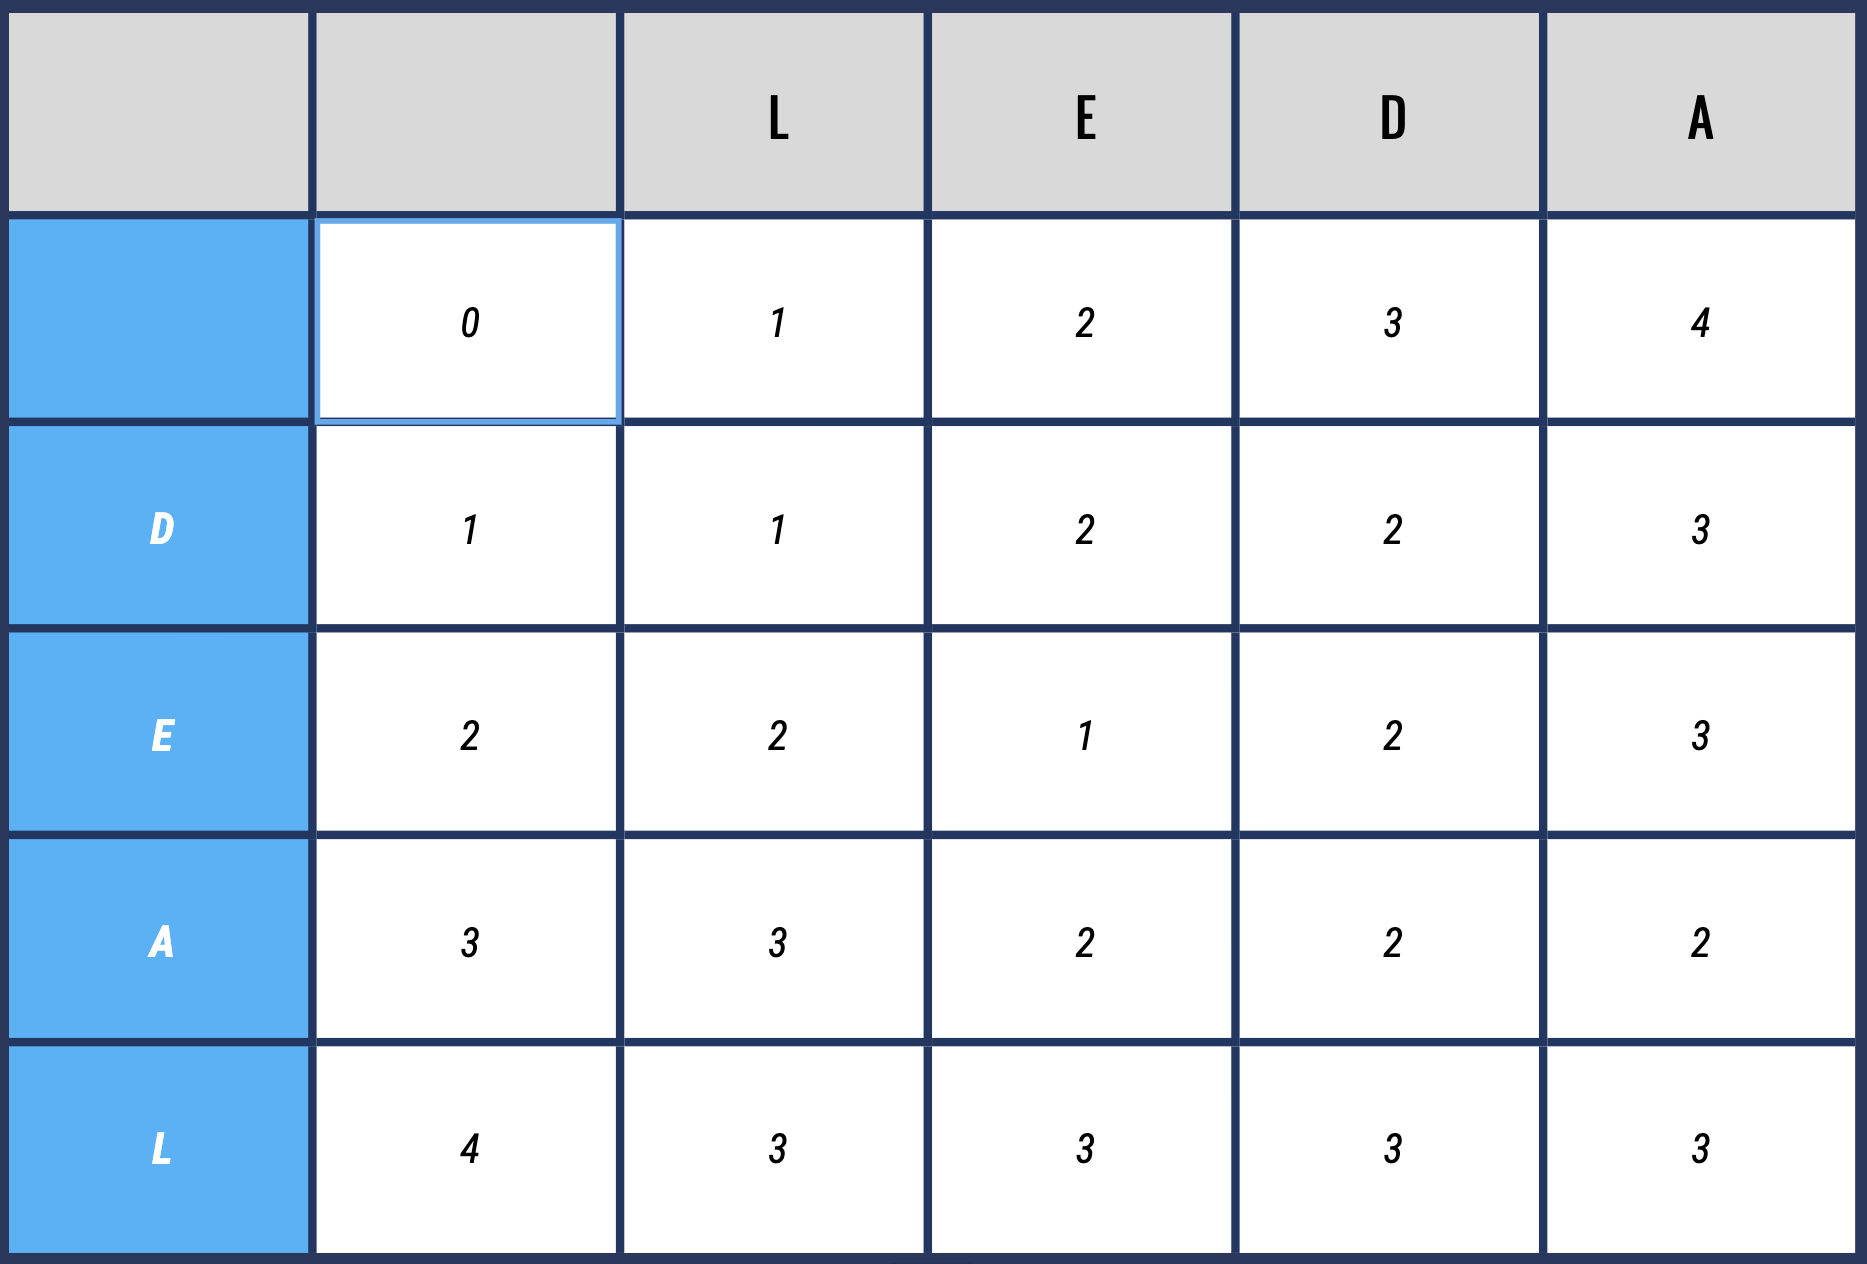

###3.Compute the edit distance (using insertion cost 1, deletion cost 1, substitution cost **2**) of “leda” to “deal” (compute the edit distance grid).

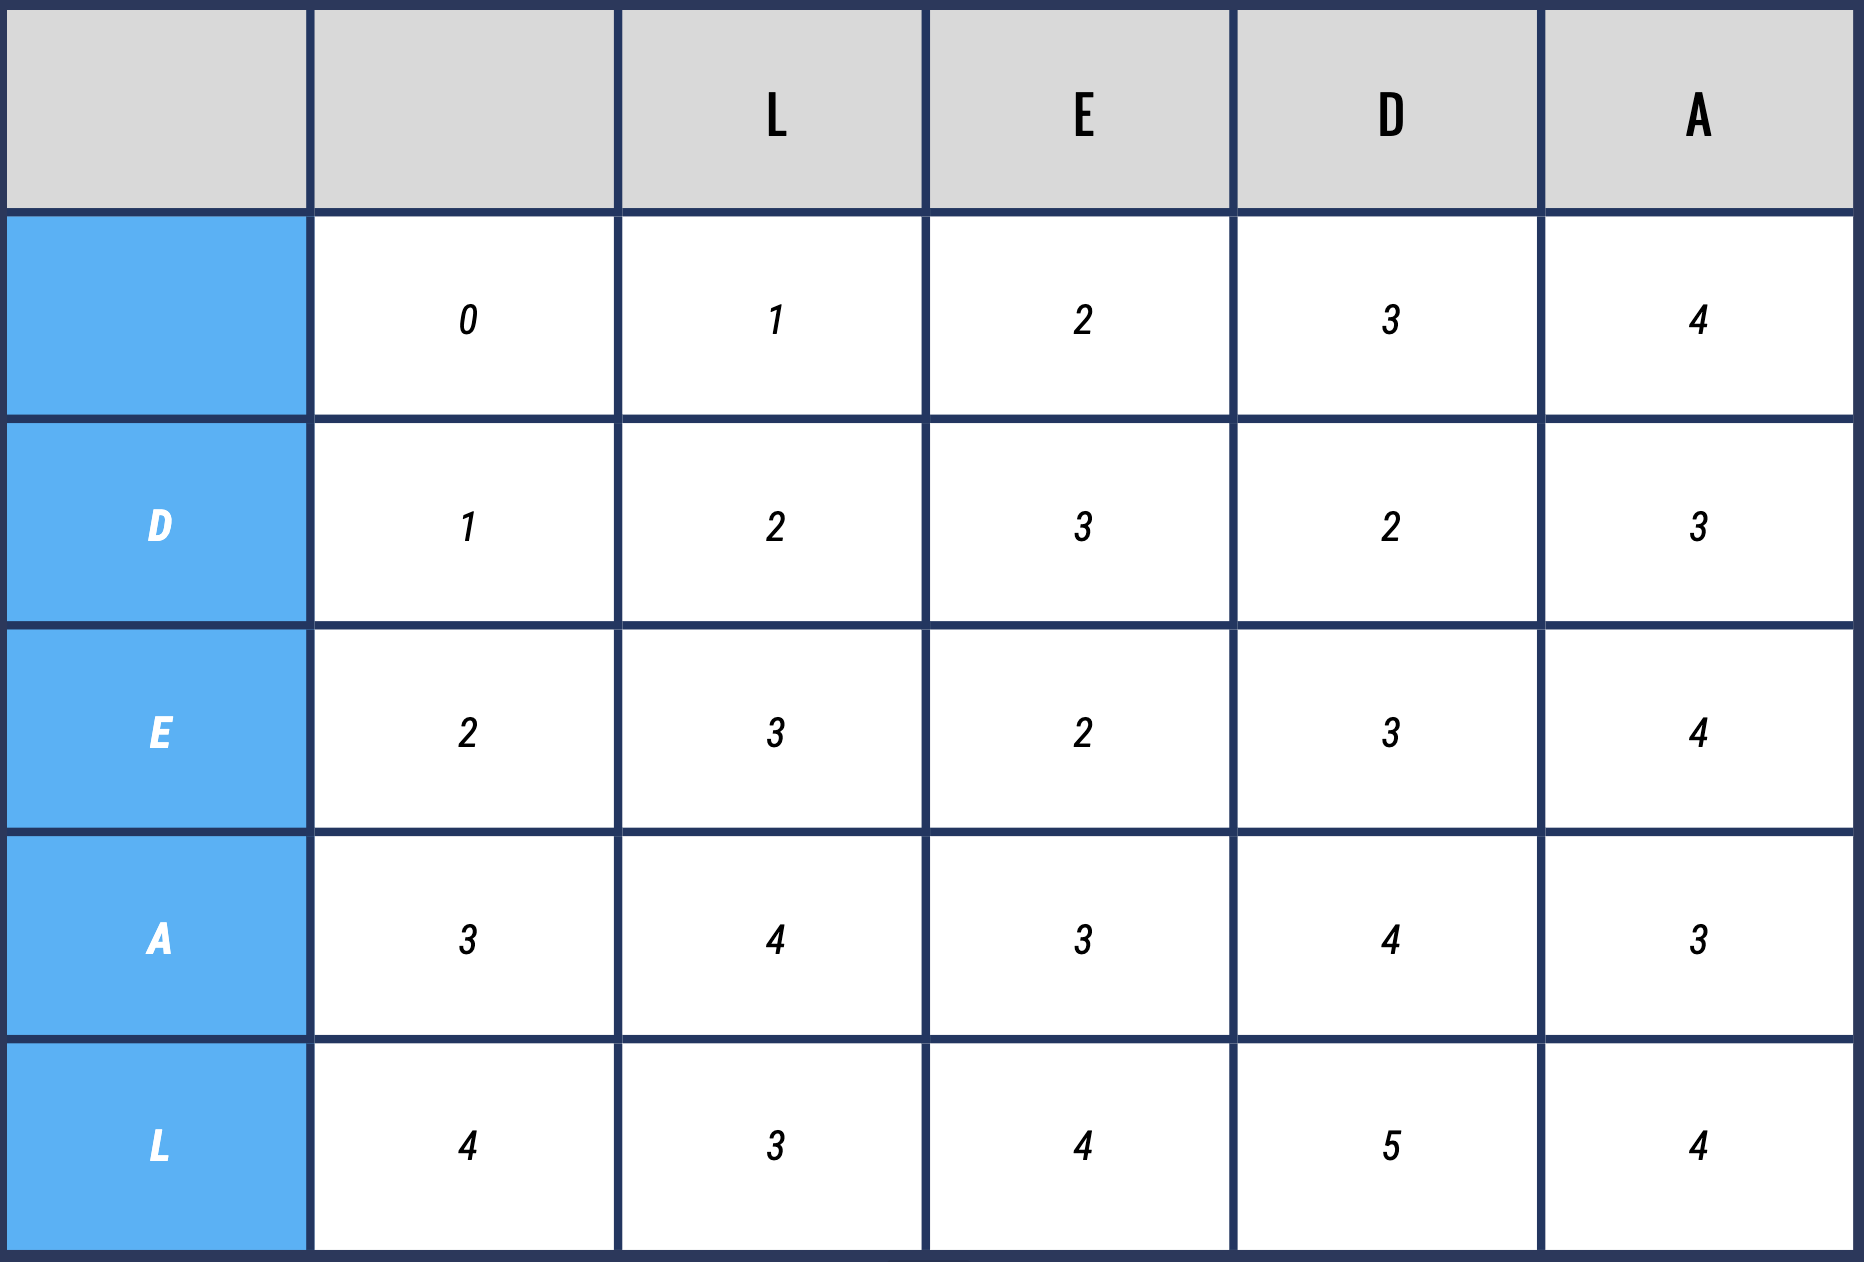

### 4. Implement the minimum edit distance algorithm and use your hand-computed results to check your code.

In [ ]:
def min_edit_distance(s1,s2):
    # Declaring array 'T' with rows = len(s1) + 1 and columns = len(s2) + 1 full of 0's:
    T = [[0 for i in range(len(s2) + 1)] for j in range(len(s1) + 1)]

    # Initialising first row:
    for i in range(len(s1) + 1):
        T[i][0] = i
    # Initialising first column:
    for j in range(len(s2) + 1):
        T[0][j] = j

    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            if s1[i - 1] == s2[j - 1]:
                T[i][j] = T[i - 1][j - 1]
            else:
                # Adding 1 to account for the cost of insertion or deletion
                insertion = 1 + T[i][j - 1]
                deletion = 1 + T[i - 1][j]
                # Adding 2 to account for the cost of non-equal substitution
                replacement = 2 + T[i - 1][j - 1]

                # Choosing the best option:
                T[i][j] = min(insertion, deletion, replacement)

    #T[len(s1)][len(s2)] is the upper right corner number which corresponds to the minimum edit distance
    print("Minimum Edit Distance from", s1, "to", s2+ ":", T[len(s1)][len(s2)]) 
    return(T[len(s1)][len(s2)])

String to be changed: s
New string: s


### 5. Use your minimum edit distance function to figure out whether drive is closer to "brief" or to "divers".

In [ ]:
def compare_edit_distance(s1, s2, s3):
    #Compute the edit distances for each of the pair of words:
    s2_distance = min_edit_distance(s1, s2)
    s3_distance = min_edit_distance(s1,s3)

    #compare the just computed edit distances and return the corresponding output
    if (s2_distance == s3_distance):
        return ("Distance between "+s1+" and "+s2+" is the same as the distance between "+s1+" and "+s3)
    if min(s2_distance, s3_distance) == s2_distance:
        return (s1+" is closer to "+s2+" than to "+s3)
    else:
        return (s1+" is closer to "+s3+" than to "+s2)
    

In [ ]:
compare_edit_distance("drive", "brief", "divers")

Minimum Edit Distance from drive to brief: 4
Minimum Edit Distance from drive to divers: 3


'drive is closer to divers than to brief'

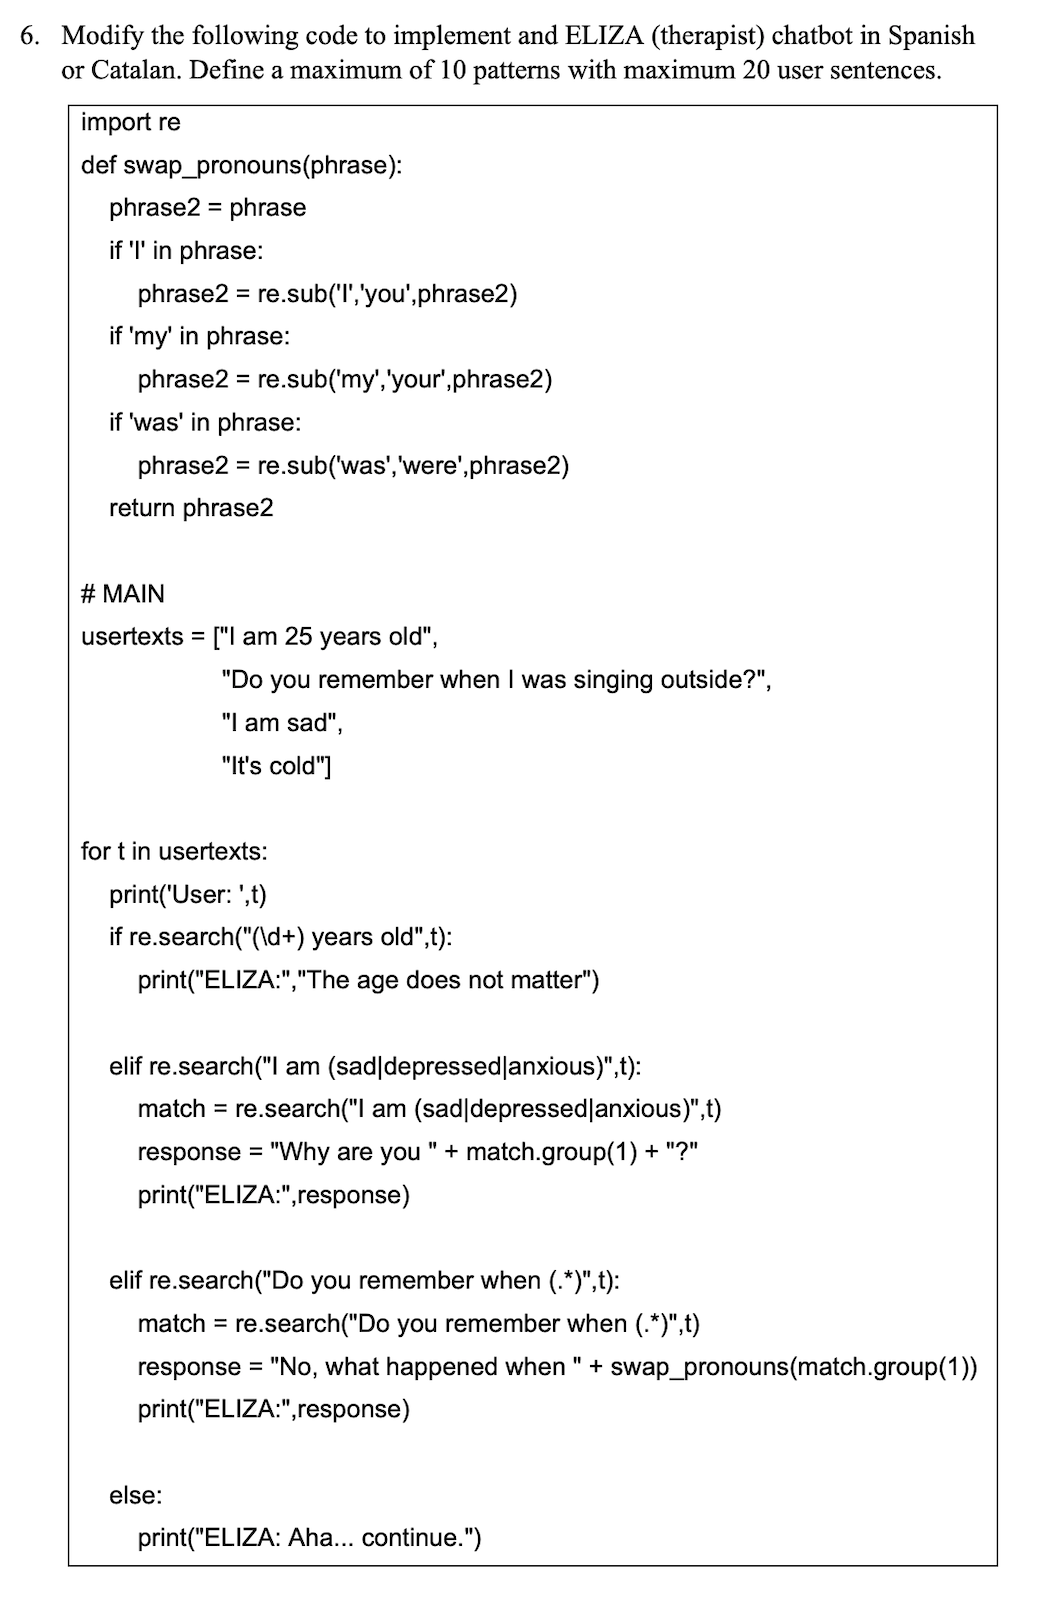

###6.Modify the following code to implement and ELIZA (therapist) chatbot in Spanish or Catalan. Define a maximum of 10 patterns with maximum 20 user sentences.

In [ ]:
import re

def swap_pronouns(phrase):
    phrase2 = phrase
    if 'yo' in phrase:
        phrase2 = re.sub('yo','tú',phrase2)
    if 'mi' in phrase:
        phrase2 = re.sub('mi','tu',phrase2)
    if 'era' in phrase:
        phrase2 = re.sub('estaba','estabas',phrase2)
    return phrase2

usertexts = ["Hola, ¿cómo estás?",
             "Estoy teniendo un mal día",
             "Mi mascota está enferma",
             "¿Qué planes tienes para el fin de semana?",
             "Estoy aburrido",
             "Mi amigo me canceló nuestros planes",
             "No sé qué hacer en mi tiempo libre",
             "Tuve una entrevista de trabajo hoy",
             "Estoy cansado de mi trabajo",
             "Acabo de terminar un libro muy interesante",
             "Mi mujer y yo tuvimos una discusión",
             "No me siento bien",
             "Acabo de lograr un gran éxito en mi carrera",
             "Acabo de comprar una casa nueva",
             "¿de que va todo esto? ¿quien eres?",
             "¿Que era Eliza originalmente? ¡Cuentame su historia!"]

for t in usertexts:
    print('Neil: ',t)
    if re.search("(\d+) años",t):
        print("ELIZA:","La edad no importa")

    elif re.search("Yo estoy (triste|depresivo|con ansiedad)",t):
        match = re.search("(triste|depresivo|con ansiedad)",t)
        response = "¿Por qué estás " + match.group(1) + "?"
        print("ELIZA:",response)

    elif re.search("Tú recuerdas cuando (.*)",t):
        match = re.search("Tú recuerdas cuando (.*)",t)
        response = "No, ¿qué pasó cuando " + swap_pronouns(match.group(1) + '?')
        print("ELIZA:",response)

    elif re.search("(mascota|animal)",t):
        response = "Lo siento por escuchar eso, ¿qué le pasa a tu mascota?"
        print("ELIZA:",response)

    elif re.search("(fin de semana|planes)",t):
        response = "No tengo planes todavía, ¿tú?"
        print("ELIZA:",response)
    
    elif re.search("(aburrido|aburrimiento)",t):
        response = "¿Has intentado hacer algo nuevo o interesante últimamente? Podrías intentar una nueva actividad o explorar un nuevo lugar."
        print("ELIZA:",response)

    elif re.search("(amigo|canceló|planes)",t):
        response = "Lo siento por escuchar eso, ¿quieres hablar sobre lo que pasó?"
        print("ELIZA:",response)
    
    elif re.search("(tiempo libre|aburrido)",t):
        response = "¿Has intentado hacer algo nuevo o interesante últimamente? Podrías intentar una nueva actividad o explorar un nuevo lugar."
        print("ELIZA:",response)

    elif re.search("(entrevista de trabajo|trabajo|hoy)",t):
        response = "¿Cómo fue tu entrevista? ¿Te fue bien?"
        print("ELIZA:",response)

    elif re.search("(cansado|fatigado)",t):
        response = "¿Cuánto tiempo has estado despierto? ¿Has intentado dormir más?"
        print("ELIZA:",response)

    elif re.search("(libro|lectura)",t):
        response = "¿Qué libro leíste? ¿Te gustó?"
        print("ELIZA:",response)

    elif re.search("(mujer|dicusión)",t):
        response = "¿Por que habeis discutido? Seguro que tienes tú la culpa"
        print("ELIZA:",response)

    elif re.search("(no me siento bien)",t):
        response = "¿Has pensado en hablar con alguien sobre esto? A veces es bueno tener una segunda opinión."
        print("ELIZA:",response)

    elif re.search("(logro|éxito|triunfo)",t):
        response = "¡Como me alegro! Eso es genial, ojala continúen tus logros"
        print("ELIZA:",response)
        
    elif re.search("(casa|hogar)",t):
        response = "¡Felicidades por tu nueva casa! ¿Cómo te sientes?"
        print("ELIZA:",response)

    elif re.search("(¿de que va todo esto? | ¿quien eres?)",t):
        response = "Este es un código Python que implementa un chatbot básico llamado Eliza. "
        response += "El código utiliza expresiones regulares para identificar ciertos patrones en la entrada del usuario "
        response += "y genera una respuesta en base a esos patrones. El código define una función llamada swap_pronouns "
        response += "que reemplaza ciertos pronombres en la frase de entrada, y luego recorre una lista de entradas de "
        response += "usuario y genera una respuesta para cada entrada. "
        print("ELIZA:",response)

    elif re.search ("(originalmente | historia)", t):
        response = "Eliza es un famoso chatbot que fue creado en "
        response += " la década de 1960 para simular a un psicoterapeuta. El Eliza original utilizaba coincidencia de "
        response += "patrones y sustitución para proporcionar respuestas a la entrada del usuario, y fue diseñado para "
        response += "imitar a un psicoterapeuta de Rogerian reflejando los sentimientos y pensamientos del usuario sin "
        response += "ofrecer ningún consejo o solución. Este código es una implementación moderna de Eliza que responde a patrones específicos de entrada del usuario."
        print("ELIZA:",response)
    

Neil:  Hola, ¿cómo estás?
Neil:  Estoy teniendo un mal día
Neil:  Mi mascota está enferma
ELIZA: Lo siento por escuchar eso, ¿qué le pasa a tu mascota?
Neil:  ¿Qué planes tienes para el fin de semana?
ELIZA: No tengo planes todavía, ¿tú?
Neil:  Estoy aburrido
ELIZA: ¿Has intentado hacer algo nuevo o interesante últimamente? Podrías intentar una nueva actividad o explorar un nuevo lugar.
Neil:  Mi amigo me canceló nuestros planes
ELIZA: No tengo planes todavía, ¿tú?
Neil:  No sé qué hacer en mi tiempo libre
ELIZA: ¿Has intentado hacer algo nuevo o interesante últimamente? Podrías intentar una nueva actividad o explorar un nuevo lugar.
Neil:  Tuve una entrevista de trabajo hoy
ELIZA: ¿Cómo fue tu entrevista? ¿Te fue bien?
Neil:  Estoy cansado de mi trabajo
ELIZA: ¿Cómo fue tu entrevista? ¿Te fue bien?
Neil:  Acabo de terminar un libro muy interesante
ELIZA: ¿Qué libro leíste? ¿Te gustó?
Neil:  Mi mujer y yo tuvimos una discusión
ELIZA: ¿Por que habeis discutido? Seguro que tienes tú la c

In [15]:
import re

def swap_pronouns(phrase):
    p = phrase
    if "yo" in phrase:
        p = re.sub("yo", "tú", p)
    if "mi" in phrase:
        p = re.sub("mi", "tu", p)
    return p
        
# main

usertexts = ["Hola, mi nombre es Ana. Soy una estudiante de inteligencia artificial.", 
             "Últimamente he estado teniendo dificultades para comprender ciertos conceptos y me siento abrumada.", 
             "Aunque trato de seguir las instrucciones de mi profesor, siento que no estoy avanzando lo suficiente.", 
             "A veces me siento estúpida por no poder entender cosas que parecen obvias para otros.", 
             "Pero sigo intentándolo. Creo que ser una buena estudiante de inteligencia artificial es importante para mi futuro.",
             "A veces me preocupa si podré conseguir un buen trabajo en este campo, pero intento no pensar en eso y concentrarme en aprender más.",
             "¿Te gusta hablar conmigo?"]

# iterate over all the possible sentences the student will say
for s in usertexts:
    
    print("Estudiante: ", s)
    
    if re.search("Ana", s):
        
        print("AI: ¡Qué casualidad! Mi creador también se llama Ana. Perdón por la interrupción, por favor continúa.")
        
    elif re.search("he estado teniendo (dificultades|problemas) para comprender", s):
        
        match = re.search("he estado teniendo (dificultades|problemas) para comprender", s)
        
        response = "Oh... ¿Podrías explicar más sobre tus " + match.group(1) + "?"
        
        print("AI: " + response)
        
    elif re.search("no estoy avanzando", s):
        
        print("AI: Entiendo cómo te sientes. A veces el aprendizaje puede ser difícil y llevar tiempo. ¿Has considerado pedir ayuda a tus compañeros o profesor?")
        
    elif re.search("(estúpid[oa])", s):

        match = re.search("(estúpid[oa])",s)
        
        print("AI: No eres " + match.group(1) + ". Todos aprendemos a nuestro propio ritmo. No te compares con los demás y sigue esforzándote.")
      
    elif re.search("(futuro)", s):
        
        match = re.search("(buen trabajo|futuro)", s)
        
        response = "Es natural preocuparse por el futuro, pero no te desanimes. Si sigues trabajando duro y mejorando tus habilidades, seguro encontrarás un buen trabajo en el campo de la inteligencia artificial."
    
        print("AI: " + response)
        
    elif re.search("(aprender|más)", s):
        
        match = re.search("(aprender|más)", s)
        
        response = "Me alegra escuchar que estás interesada en aprender más. La inteligencia artificial es un campo emocionante y siempre hay más por descubrir y aprender."

        print("AI: " + response)

    elif re.search("(Te gusta)",s):

        match = re.search("(Te gusta.*)", s)

        response = "No me puede gustar o dejar de gustar, soy una Inteligencia Artificial"

        print("AI: " + response)


Estudiante:  Hola, mi nombre es Ana. Soy una estudiante de inteligencia artificial.
AI: ¡Qué casualidad! Mi creador también se llama Ana. Perdón por la interrupción, por favor continúa.
Estudiante:  Últimamente he estado teniendo dificultades para comprender ciertos conceptos y me siento abrumada.
AI: Oh... ¿Podrías explicar más sobre tus dificultades?
Estudiante:  Aunque trato de seguir las instrucciones de mi profesor, siento que no estoy avanzando lo suficiente.
AI: Entiendo cómo te sientes. A veces el aprendizaje puede ser difícil y llevar tiempo. ¿Has considerado pedir ayuda a tus compañeros o profesor?
Estudiante:  A veces me siento estúpida por no poder entender cosas que parecen obvias para otros.
AI: No eres estúpida. Todos aprendemos a nuestro propio ritmo. No te compares con los demás y sigue esforzándote.
Estudiante:  Pero sigo intentándolo. Creo que ser una buena estudiante de inteligencia artificial es importante para mi futuro.
AI: Es natural preocuparse por el futuro, p